![imangen](https://cdn-images-1.medium.com/max/464/1*ElXMhmHEKEht5B41t5oUEQ@2x.png)

# Análisis de datos Indian Premier League
---

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. IPL has an exclusive window in ICC Future Tours Programme.  

The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube. The brand value of IPL in 2018 was US$6.3 billion, according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹11.5 billion to the GDP of the Indian economy.  

There have been twelve seasons of the IPL tournament. The current IPL title holders are the Mumbai Indians, who won the 2019 season.  

here is a link to the python [notebook](https://github.com/sudeepto22/ipl-stats/blob/master/IPL%20Analysis.ipynb)

---
**Realiado por Luis Hernández**  
luishernandezmatos@yahoo.com  
**Fecha:** 8 de mayo 2020

### Librerias

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

## Dataset

In [2]:
df = pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## EDA  
1. [x] Estadítica de los datos  
2. [x] Verificar las columnas Nulas, si no son necesarias eleimninarlas
3. [x] Verificar el total de matches_played and number of season
4. [x] Los jugadores que tengan el mayor juego jugado
5. [x] Cual de los equipos tienen el mayor margen de ganados
6. [x] Jugador por ciudad
7. [x] La cantidad de resultados por equipos
8. [x] la toss descicion por equipos que ganadores
9. [X] el promedio de win_by_wickets por ciudad

#### 1- Estadíticas

In [3]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


#### 2. Datos Nulos

In [6]:
df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [7]:
#eliminar a columns umpire3
df.drop('umpire3', axis = 'columns', inplace = True)

#### 3.- Verificar el total de matches_played and number of season

In [33]:
#numero de macht
print('Total de juegos   ====>', df.shape[0]) 

df['conteo'] = 1
temporadas = df.groupby('season').conteo.count().sort_index()
print('Cantidad de temporadas =====>', len(temporadas.index) )

Total de juegos   ====> 636
Cantidad de temporadas =====> 10


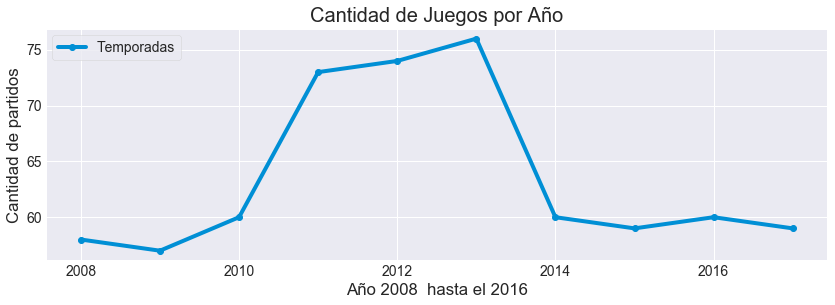

In [101]:
plt.figure(figsize = (12.5,4))
plt.title("Cantidad de Juegos por Año", size = 20)
plt.plot(temporadas, label='Temporadas', marker= 'o')
plt.xlabel('Año 2008  hasta el 2016')
plt.ylabel('Cantidad de partidos')
plt.legend(loc = 'upper left')
plt.show()

#### 4. Los jugadores que tengan el mayor juego jugado

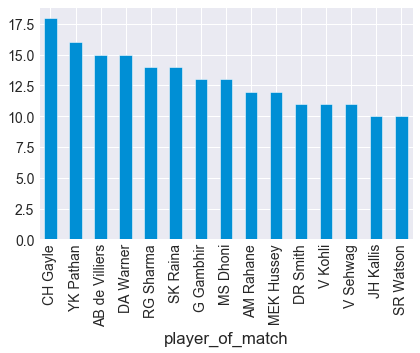

In [53]:
top_players.nlargest(n=15).plot(kind='bar')
plt.show()

In [52]:
top_players = df.groupby('player_of_match').conteo.count()
top_players.nlargest(n=15)

player_of_match
CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
RG Sharma         14
SK Raina          14
G Gambhir         13
MS Dhoni          13
AM Rahane         12
MEK Hussey        12
DR Smith          11
V Kohli           11
V Sehwag          11
JH Kallis         10
SR Watson         10
Name: conteo, dtype: int64

#### 5-Cual de los equipos tienen el mayor promedio de Carreras

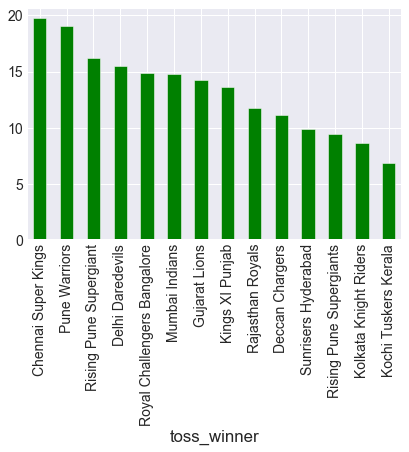

In [83]:
runs.nlargest(n=15).plot(kind='bar', color ='g')
plt.show()

In [55]:
runs= df.groupby('toss_winner').win_by_runs.mean()
runs.nlargest(n=15)

toss_winner
Chennai Super Kings            19.772727
Pune Warriors                  19.100000
Rising Pune Supergiant         16.166667
Delhi Daredevils               15.527778
Royal Challengers Bangalore    14.885714
Mumbai Indians                 14.800000
Gujarat Lions                  14.266667
Kings XI Punjab                13.647059
Rajasthan Royals               11.777778
Deccan Chargers                11.116279
Sunrisers Hyderabad             9.857143
Rising Pune Supergiants         9.428571
Kolkata Knight Riders           8.615385
Kochi Tuskers Kerala            6.875000
Name: win_by_runs, dtype: float64

#### 6- Jugador por ciudad

In [108]:
df.groupby(['player_of_match','city' ]).conteo.sum()

player_of_match  city        
A Chandila       Jaipur          1
A Kumble         Chennai         1
                 Johannesburg    1
                 Mumbai          1
A Mishra         Delhi           3
                                ..
Yuvraj Singh     Durban          1
                 Hyderabad       1
                 Johannesburg    1
                 Mumbai          1
Z Khan           Raipur          1
Name: conteo, Length: 472, dtype: int64

#### 7-La cantidad de resultados por equipos

In [165]:
resultados= df.groupby(['result','winner']).conteo.count()
resultados.unstack()

winner,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
result,,,,,,,,,,,,,,
normal,79.0,29.0,62.0,13.0,68.0,6.0,77.0,91.0,12.0,61.0,10.0,5.0,72.0,41.0
tie,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,1.0,1.0


#### 10-  la toss descicion por equipos que ganadores

In [159]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'conteo'],
      dtype='object')

In [164]:
df.groupby(['toss_decision','winner']).conteo.count().unstack()

winner,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
toss_decision,,,,,,,,,,,,,,
bat,50.0,14.0,28.0,2.0,20.0,NaN,34.0,41.0,9.0,30.0,NaN,2.0,26.0,16.0
field,29.0,15.0,34.0,11.0,50.0,6.0,43.0,51.0,3.0,33.0,10.0,3.0,47.0,26.0


#### 11- el promedio de win_by_wickets por ciudad

In [167]:
top_15 = df.groupby('city').win_by_wickets.mean()
top_15.nlargest(n=15)

city
Indore          7.200000
Kanpur          5.500000
Rajkot          4.800000
Jaipur          4.575758
Johannesburg    4.375000
Sharjah         4.333333
Raipur          4.166667
Centurion       4.083333
Hyderabad       3.755102
Kolkata         3.672131
Chandigarh      3.630435
Bangalore       3.515152
Ranchi          3.428571
Kimberley       3.333333
Delhi           3.200000
Name: win_by_wickets, dtype: float64